In [1]:
import sys
import os

sys.path.append(os.path.abspath('..'))

import pandas as pd
import matplotlib.pyplot as plt
from pipeline import Pipeline

In [2]:
pipeline = Pipeline(
    ratings_path='../storage/u.data',
    items_path='../storage/u.item',
    users_path='../storage/u.user'
)

pipeline.load_dataset()

print("Ratings Dataset:")
print(pipeline.ratings_df.head())
print(pipeline.ratings_df.info())
print(pipeline.ratings_df.describe())

print("Items Metadata:")
print(pipeline.items_df.head())

print("Users Metadata:")
print(pipeline.users_df.head())

Ratings Dataset:
   user_id  item_id  rating           timestamp
0      196      242       3 1997-12-04 15:55:49
1      186      302       3 1998-04-04 19:22:22
2       22      377       1 1997-11-07 07:18:36
3      244       51       2 1997-11-27 05:02:03
4      166      346       1 1998-02-02 05:33:16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   user_id    100000 non-null  int64         
 1   item_id    100000 non-null  int64         
 2   rating     100000 non-null  int64         
 3   timestamp  100000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 3.1 MB
None
            user_id        item_id         rating
count  100000.00000  100000.000000  100000.000000
mean      462.48475     425.530130       3.529860
std       266.61442     330.798356       1.125674
min         1.00000       1.000000  

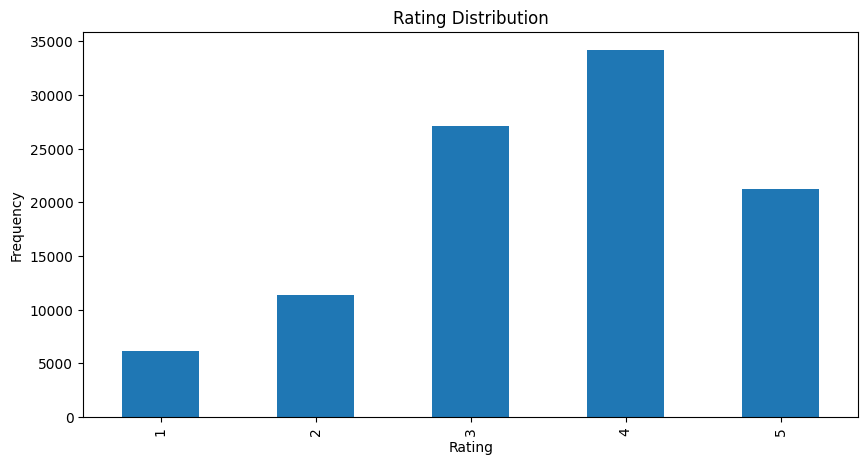

In [3]:
ratings = pipeline.ratings_df['rating']
ratings.value_counts().sort_index().plot(kind='bar', figsize=(10, 5))
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

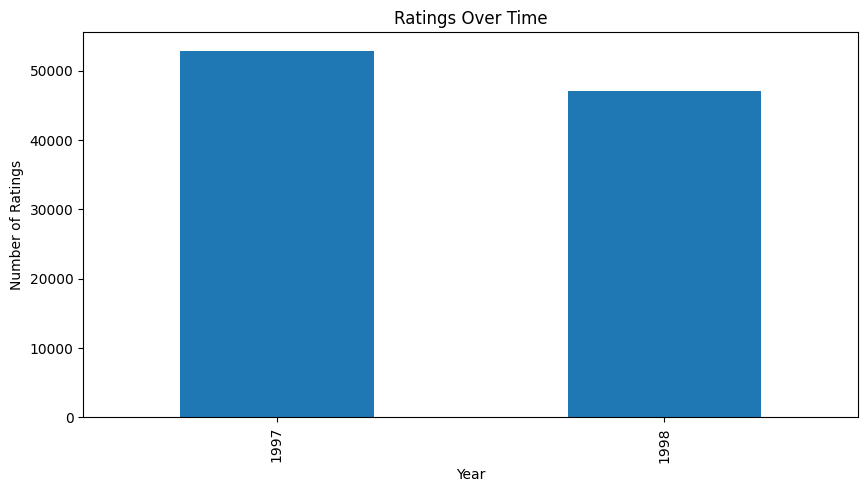

In [4]:
pipeline.ratings_df['year'] = pipeline.ratings_df['timestamp'].dt.year

pipeline.ratings_df['year'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5))
plt.title("Ratings Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Ratings")
plt.show()

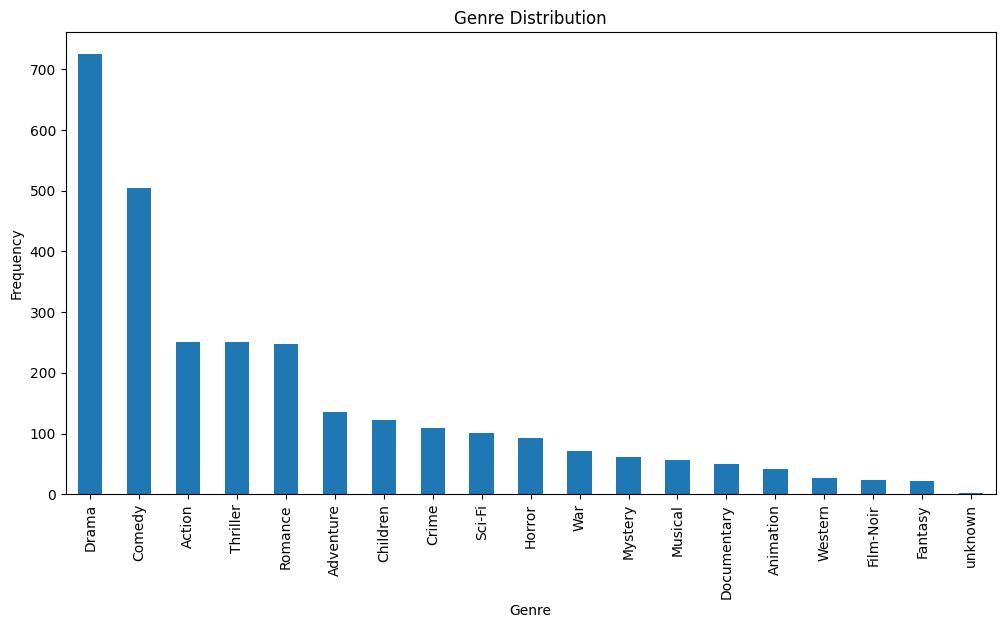

In [5]:
genre_counts = pipeline.items_df['genres'].str.split(',').explode().value_counts()
genre_counts.plot(kind='bar', figsize=(12, 6))
plt.title("Genre Distribution")
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.show()

Training set size: 80307, Testing set size: 19693


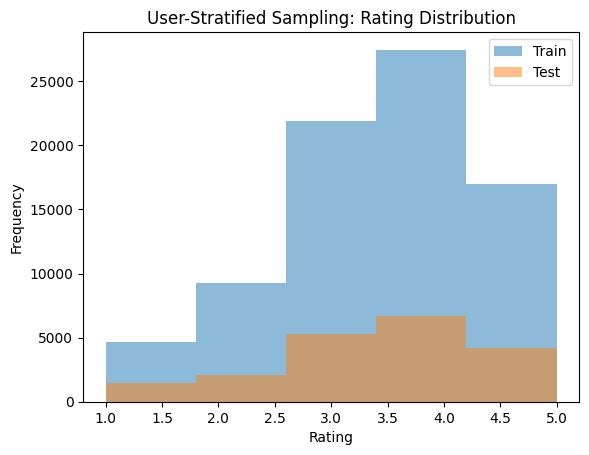

In [6]:
train_df, test_df = pipeline.partition_data(partition_type='user_stratified')

print(f"Training set size: {len(train_df)}, Testing set size: {len(test_df)}")

train_ratings = train_df['rating']
test_ratings = test_df['rating']

plt.hist(train_ratings, alpha=0.5, label='Train', bins=5)
plt.hist(test_ratings, alpha=0.5, label='Test', bins=5)
plt.title("User-Stratified Sampling: Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Training set size: 80000, Testing set size: 20000


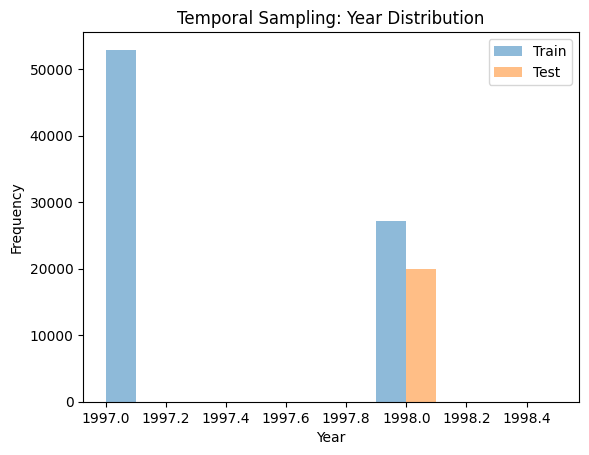

In [7]:
train_df, test_df = pipeline.partition_data(partition_type='temporal')

print(f"Training set size: {len(train_df)}, Testing set size: {len(test_df)}")

plt.hist(train_df['timestamp'].dt.year, alpha=0.5, label='Train', bins=10)
plt.hist(test_df['timestamp'].dt.year, alpha=0.5, label='Test', bins=10)
plt.title("Temporal Sampling: Year Distribution")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.legend()
plt.show()